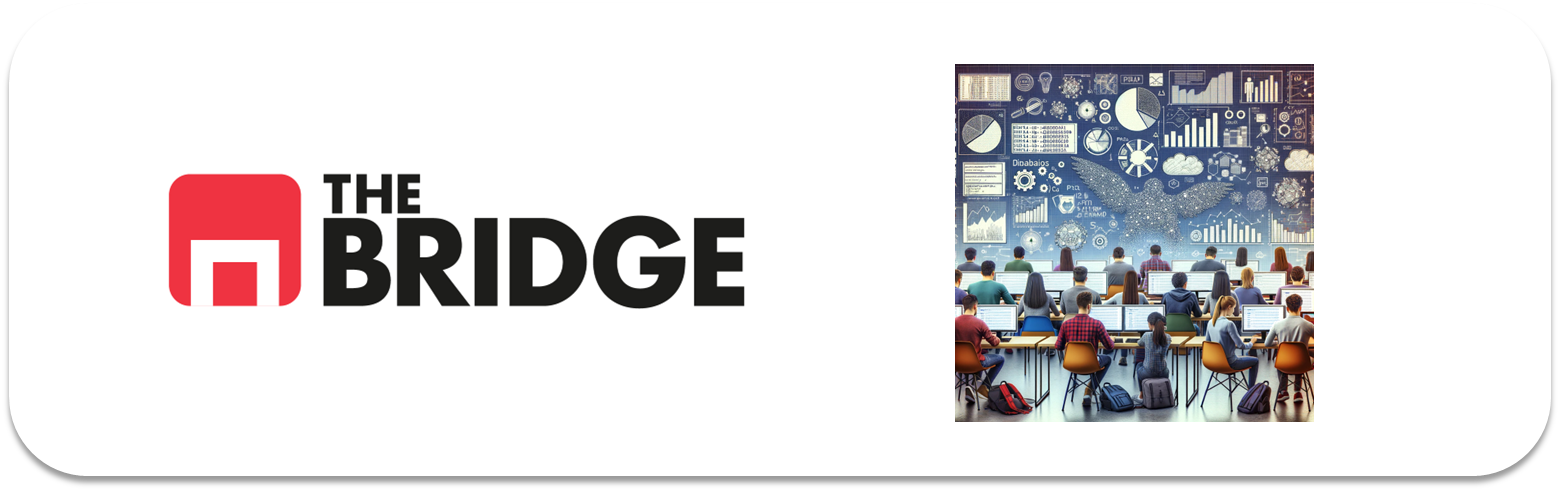

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:

~~1. Carga el dataset del Titanic.~~

~~2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.~~

~~3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.~~


~~4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.~~


~~5. Construye las parejas X,y de train y test.~~

~~6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.~~

7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [7]:
df = pd.read_csv("./titanic.csv")

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
#me cargo columnas inutiles
df.drop(['pclass','sibsp','parch','embarked','alone','alive'], axis=1, inplace =True)

In [22]:
#me cargo duplicados
df.dropna(inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

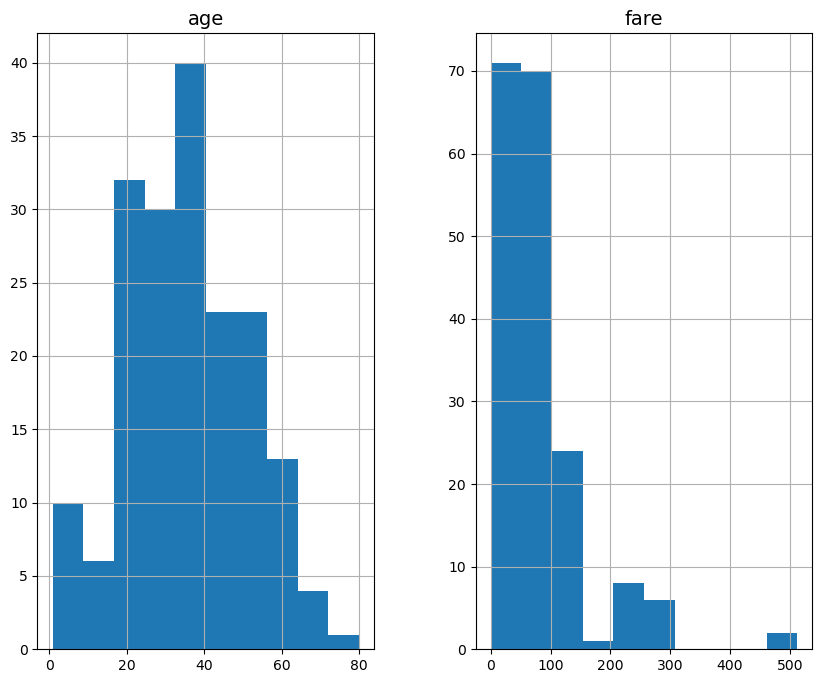

In [28]:
df.drop(columns=['survived']).hist(bins=10, figsize=(10, 8))

In [41]:
#divido el dataset
X= df.drop(['survived'], axis=1 )
y=df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

In [48]:
# Separar variables numéricas y categóricas
numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(exclude=['number']).columns

#Calcular estadísticas de imputación
numeric_means = X_train[numeric_columns].mean()  # Medias para numéricas
categorical_modes = X_train[categorical_columns].mode().iloc[0]  # Modas para categóricas

# Imputar valores nulos en X_train
X_train_imputed = X_train.copy()
X_train_imputed[numeric_columns] = X_train[numeric_columns].fillna(numeric_means)
X_train_imputed[categorical_columns] = X_train[categorical_columns].fillna(categorical_modes)

# Imputar valores nulos en X_test usando las mismas estadísticas
X_test_imputed = X_test.copy()
X_test_imputed[numeric_columns] = X_test[numeric_columns].fillna(numeric_means)
X_test_imputed[categorical_columns] = X_test[categorical_columns].fillna(categorical_modes)


Frecuencias en survived:
survived
1    123
0     59
Name: count, dtype: int64




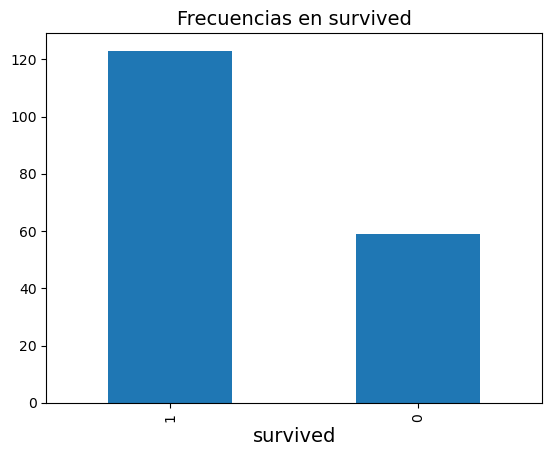

Frecuencias en sex:
sex
male      94
female    88
Name: count, dtype: int64




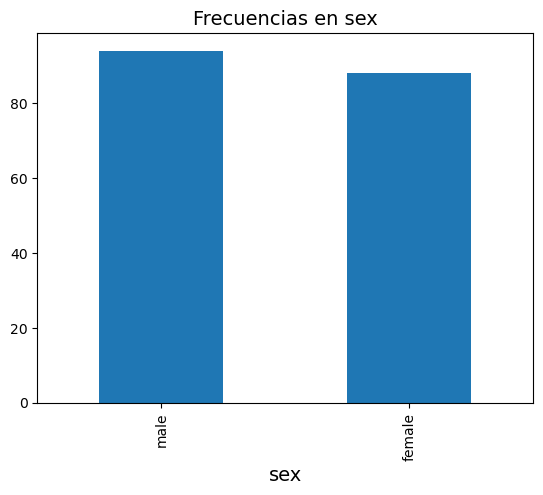

Frecuencias en class:
class
First     157
Second     15
Third      10
Name: count, dtype: int64




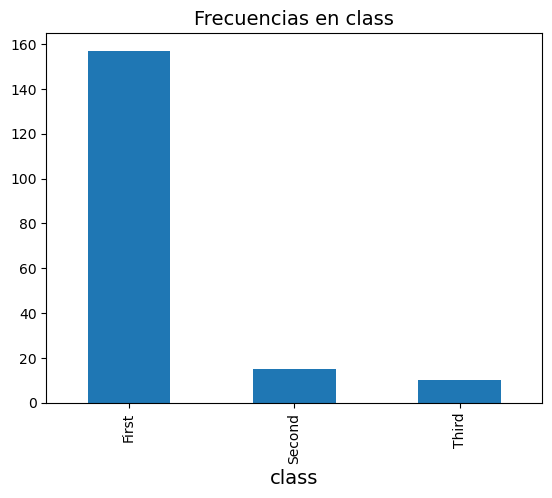

Frecuencias en who:
who
man      87
woman    82
child    13
Name: count, dtype: int64




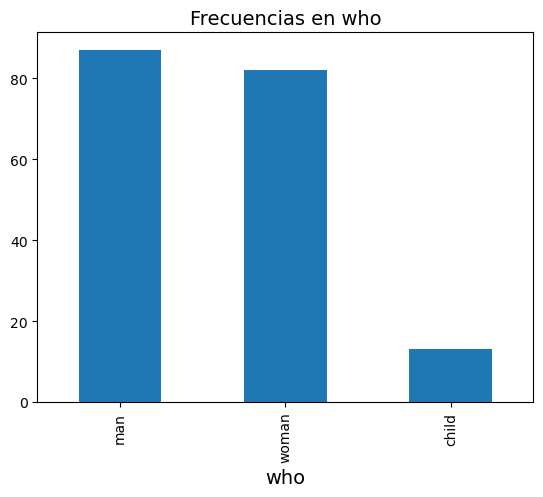

Frecuencias en adult_male:
adult_male
False    95
True     87
Name: count, dtype: int64




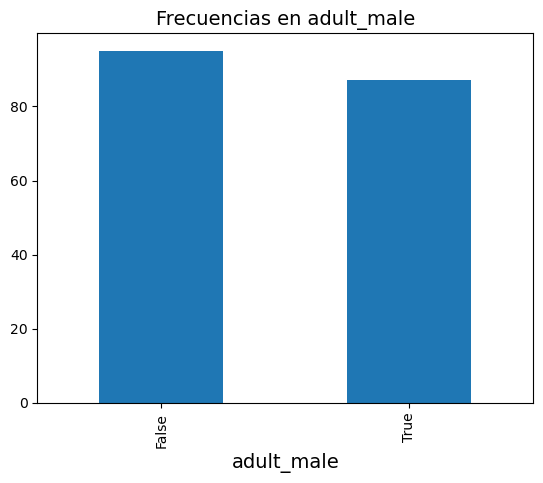

Frecuencias en deck:
deck
C    51
B    43
D    31
E    30
A    12
F    11
G     4
Name: count, dtype: int64




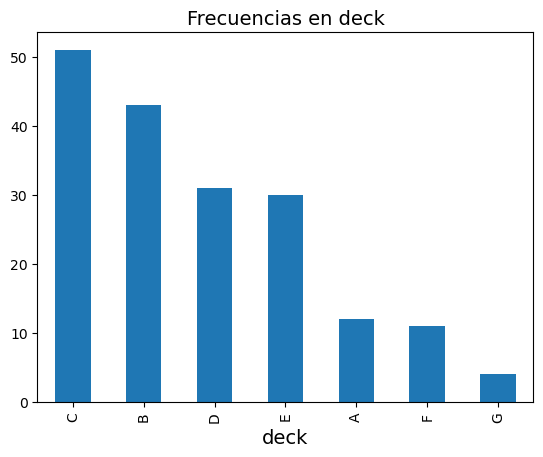

Frecuencias en embark_town:
embark_town
Southampton    115
Cherbourg       65
Queenstown       2
Name: count, dtype: int64




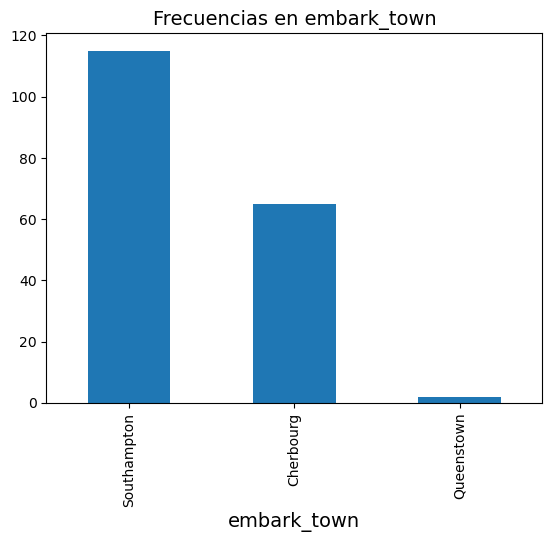

Frecuencias en alive:
alive
yes    123
no      59
Name: count, dtype: int64




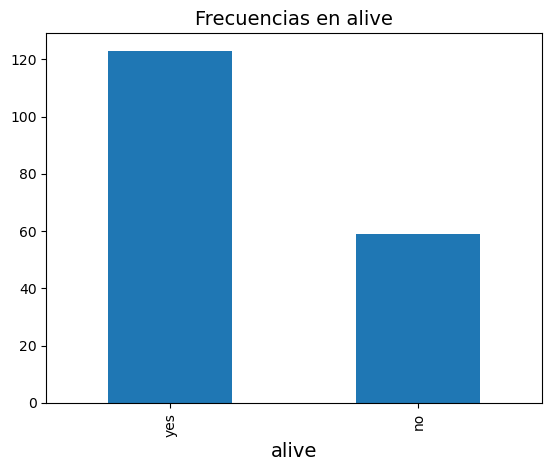

In [57]:
#MiniEDA
# Análisis de frecuencias para variables categóricas
categorical_columns = ['survived', 'sex', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive']

for col in categorical_columns:
    print(f"Frecuencias en {col}:")
    print(df[col].value_counts())
    print("\n")
    df[col].value_counts().plot(kind='bar', title=f"Frecuencias en {col}")
    plt.show()

In [55]:
df.columns

Index(['survived', 'sex', 'age', 'fare', 'class', 'who', 'adult_male', 'deck',
       'embark_town', 'alive'],
      dtype='object')

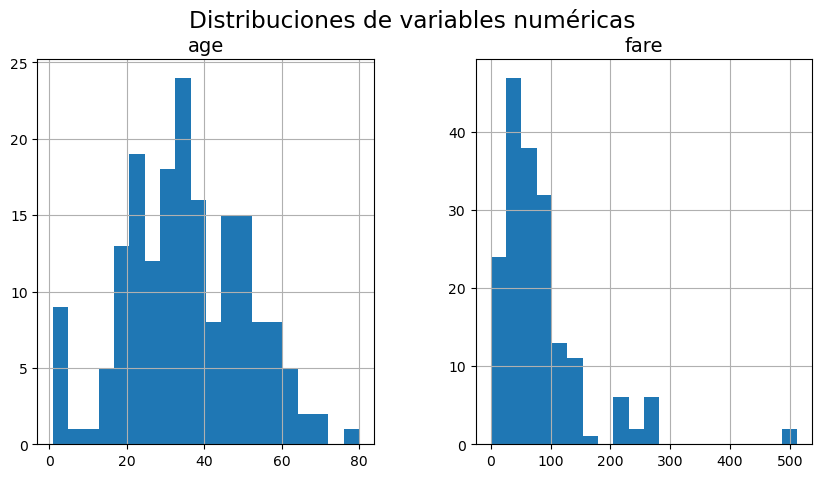

In [59]:
# Análisis de variables numéricas
numeric_columns = ['age', 'fare']

df[numeric_columns].hist(bins=20, figsize=(10, 5), layout=(1, 2))
plt.suptitle("Distribuciones de variables numéricas")
plt.show()

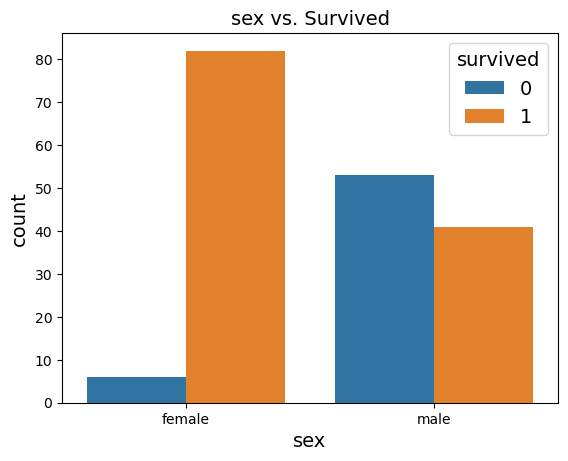

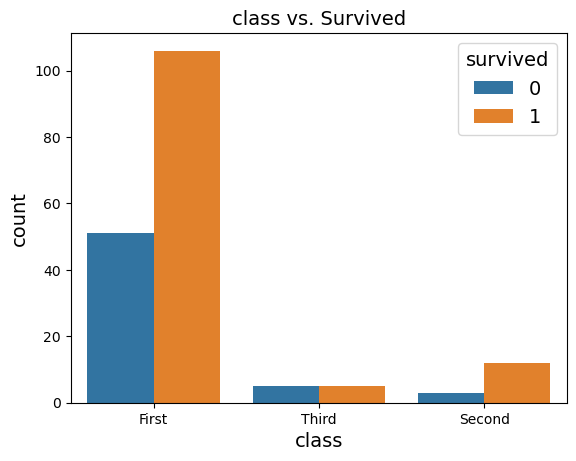

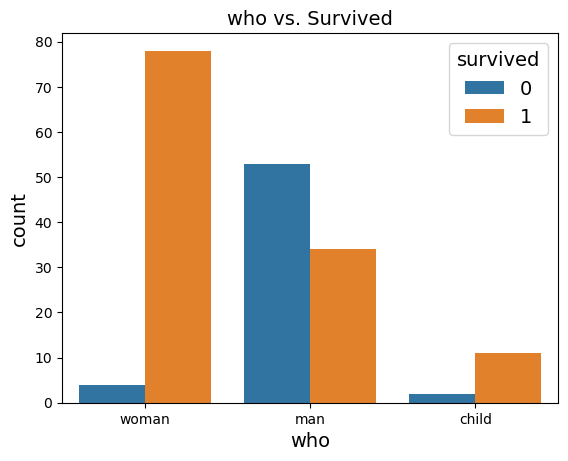

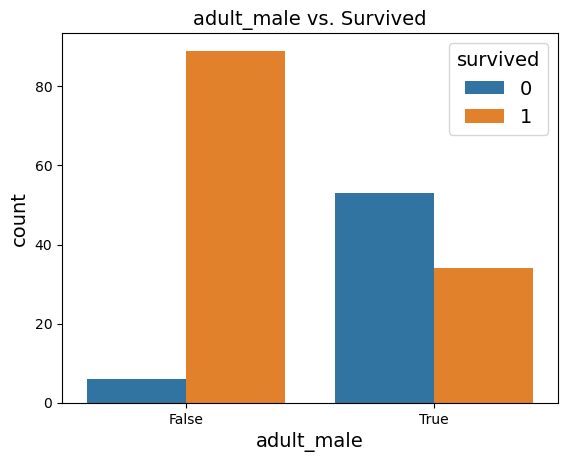

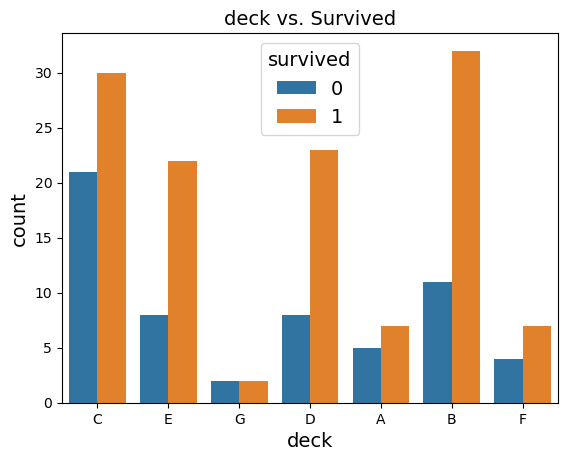

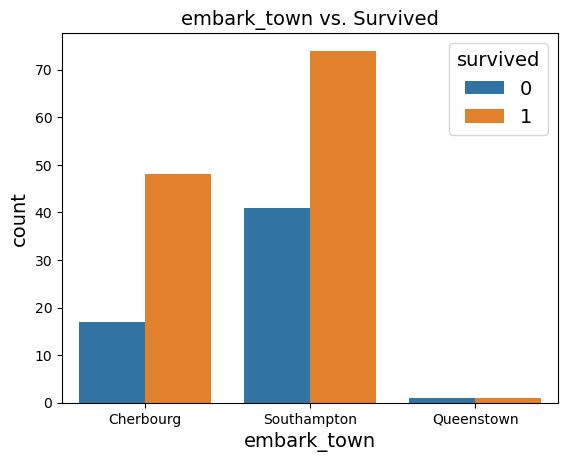

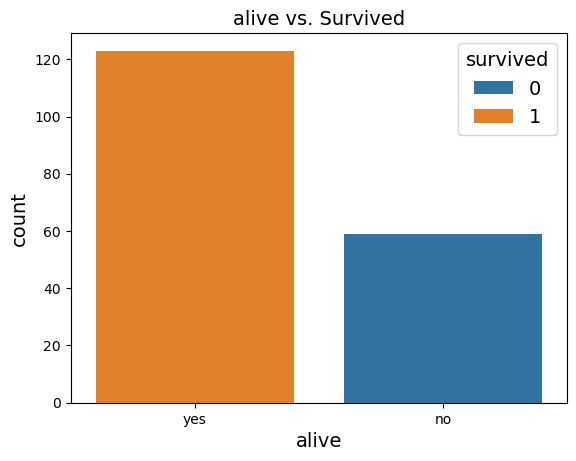

In [61]:
# Variables categóricas vs. survived
for col in categorical_columns:
    if col != 'survived':
        sns.countplot(data=df, x=col, hue='survived')
        plt.title(f"{col} vs. Survived")
        plt.show()

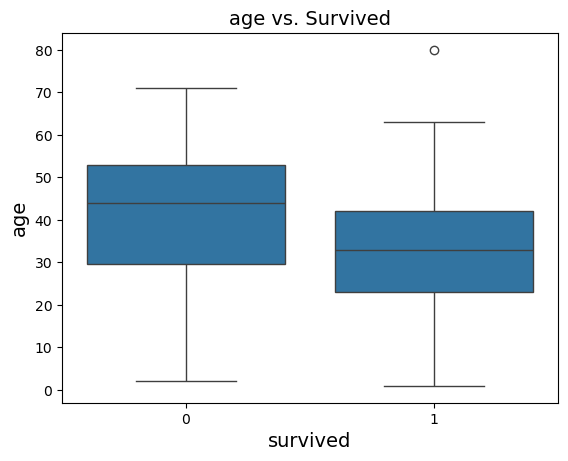

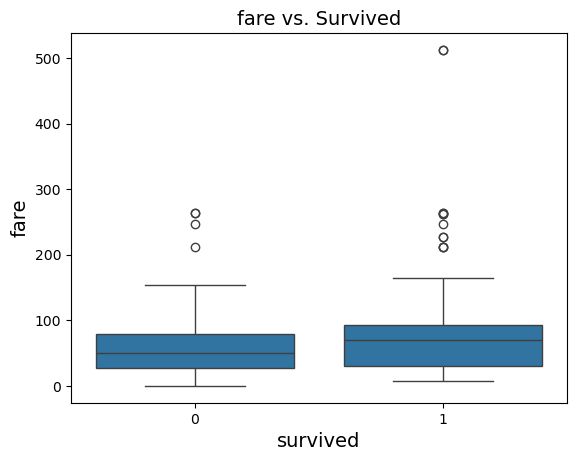

In [63]:
# Distribución de variables numéricas según survived
for col in numeric_columns:
    sns.boxplot(data=df, x='survived', y=col)
    plt.title(f"{col} vs. Survived")
    plt.show()

In [73]:
# Matriz de correlación
plt.figure(figsize = (7,7))
sns.heatmap(X_train.corr(),
            vmin=-0.1,
            vmax=1,
            cmap=sns.diverging_palette(145,280,s=85,l=25,n=7),
            annot=True);

ValueError: could not convert string to float: 'male'

<Figure size 700x700 with 0 Axes>